<a href="https://colab.research.google.com/github/Anurag-sid/openCV/blob/main/Working_with_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



What we are going to do in the code:

    Allows the user to upload an image.

    Convert the image and grayscale and resize it and Displays the original, grayscale, and resized versions of the image.

    Draws a rectangle on the image.

    Saves the final image as "annotated.jpg" and confirms the save.

It’s a simple image processing script that can be used for visualizing and annotating images.


In [1]:
import cv2  # OpenCV library for image processing.
import numpy as np   #  For handling arrays
import matplotlib.pyplot as plt  # For Visualization
from google.colab.patches import cv2_imshow  # A special function to display images
from google.colab import files  #To handle file uploads in Google Colab
uploaded = files.upload()   #prompts the user to upload an image

Saving download (10).jpeg to download (10).jpeg


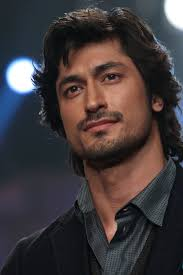

In [2]:
  filename = list(uploaded.keys())[0]  # gets the name of the first uploaded file.
  img = cv2.imread(filename)  # reads the uploaded image.
  cv2_imshow(img)  # displays the original image

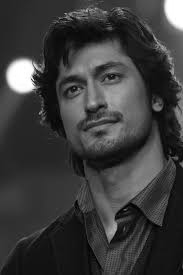

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # converts the original image (img) into grayscale.
cv2_imshow(gray)

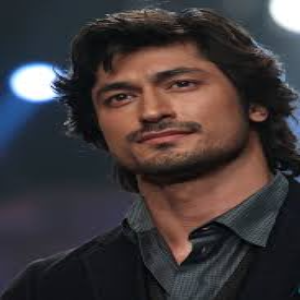

In [4]:
resized = cv2.resize(img,(300,300))  # resizes the original image to a 300x300 pixel size.
cv2_imshow(resized)

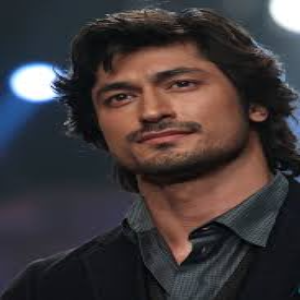

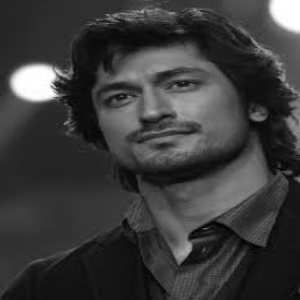

In [5]:
a = [img,gray]
for i in a:
  resized = cv2.resize(i,(300,300))
  cv2_imshow(resized)

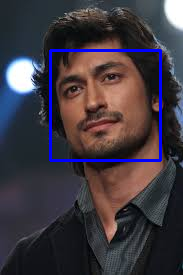

In [6]:
from typing_extensions import Annotated
annotated = img.copy()  # A copy of the original image is created
cv2.rectangle(annotated, (50, 50), (160, 160), (255,0,0), 2)  #( , , ,) -> (B, G , R)
# here (50, 50) is the top-left corner and (160, 160) is the bottom-right corner.
#The rectangle is drawn with a blue color (255, 0, 0) and thickness 2.
cv2_imshow(annotated)

In [7]:
cv2.imwrite('annotated.jpg',annotated) # saves the annotated image with the drawn rectangle as a new file named annotated.jpg.
print("Image saved as annotated.jpg")

Image saved as annotated.jpg



# *DATA AUGMENTATION*

This code applies data augmentation techniques to an image using TensorFlow's ImageDataGenerator. Data augmentation is commonly used in machine learning to artificially increase the size and diversity of a dataset by applying random transformations to images.

This code:

    Loads an image and preprocesses it (resizes, converts to array).

    Sets up an ImageDataGenerator to apply various random augmentations to the image (like rotation, flipping, and brightness adjustments).

    Generates and displays 5 augmented versions of the image, one at a time, using matplotlib.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
#ImageDataGenerator :  A class from tensorflow.keras.preprocessing.image,used to generate batches of augumented image data.
# load_img, img_to_array :  Functions to load an image from a file and convert it into a NumPy array.

In [9]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving download (26).jpeg to download (26).jpeg


In [10]:
#loads the image and resizes it to a fixed size of 224x224 pixels (common size for deep learning models like ResNet, VGG, etc.).
img = load_img(filename, target_size = (224,224))
img_array = img_to_array(img)  # converts the image into a NumPy array.
#adds an extra dimension to the array, making it compatible with TensorFlow’s input requirements
img_array = np.expand_dims(img_array, axis = 0)

In [11]:
datagen = ImageDataGenerator(
    rotation_range = 50,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    brightness_range = (0.5,1.5)
)

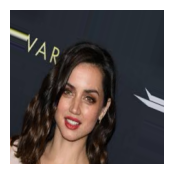

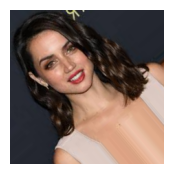

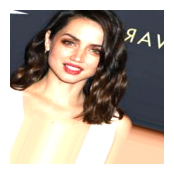

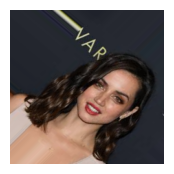

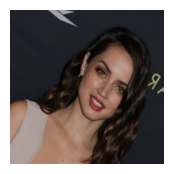

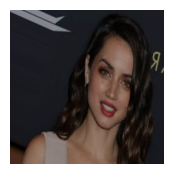

In [12]:
i=0
# This line starts generating augmented images in batches. Since the batch size is 1, only one image is generated at a time.
for batch in datagen.flow(img_array, batch_size=1):
  plt.figure(figsize=(2,2))
  # Converts the generated batch (a NumPy array) into an image for display. The astype('uint8') ensures pixel values are in the 0-255 range (standard for image display).
  plt.imshow(batch[0].astype('uint8'))
  plt.axis('off')
  i+=1
  if i>5:
    break


# OBJECT DETECTION.

This code is performing object detection using the YOLOv5 model. YOLOv5 is a popular deep learning model for real-time object detection, and this code sets up an environment to use it on an uploaded image.

What we are going to do in this code:

    You clone the YOLOv5 repository and install necessary dependencies.

    You upload an image file (test.jpg), and it’s renamed.

    YOLOv5’s detect.py script is run to perform object detection on the image, using the small YOLOv5 model (yolov5s.pt).

    The result, with detected objects highlighted, is displayed in the notebook.

In [7]:
!rm -rf yolov5  # Remove the old folder if it's available
!git clone https://github.com/ultralytics/yolov5
%cd yolov5 #This changes the working directory to the yolov5 folder, which contains the code for running YOLOv5.

Cloning into 'yolov5'...
remote: Enumerating objects: 17395, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 17395 (delta 57), reused 20 (delta 20), pack-reused 17320 (from 3)
Receiving objects: 100% (17395/17395), 16.27 MiB | 23.20 MiB/s, done.
Resolving deltas: 100% (11923/11923), done.
/content/yolov5


In [8]:
!ls

benchmarks.py	 data	     LICENSE	     README.zh-CN.md   tutorial.ipynb
CITATION.cff	 detect.py   models	     requirements.txt  utils
classify	 export.py   pyproject.toml  segment	       val.py
CONTRIBUTING.md  hubconf.py  README.md	     train.py


In [9]:
%pwd

'/content/yolov5'

In [12]:
from posix import rename
from google.colab import files
uploaded = files.upload()

import os
uploaded_file = list(uploaded.keys())[0] #Retrieves the name of the uploaded file.
os,rename(uploaded_file,'test.jpg')  #Renames the uploaded file to 'test.jpg' (you can adjust this name if needed).

Saving abdn.png to abdn.png


(<module 'os' (frozen)>, None)

In [13]:
#This step runs the object detection algorithm on the image and saves the output with bounding boxes drawn around detected objects.
!python detect.py --weights yolov5s.pt --img 640 --conf 0.3 --source test.jpg

detect: weights=['yolov5s.pt'], source=test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-413-gf2f86eb3 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/test.jpg: 384x640 2 cats, 1 dog, 313.7ms
Speed: 5.0ms pre-process, 313.7ms inference, 40.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


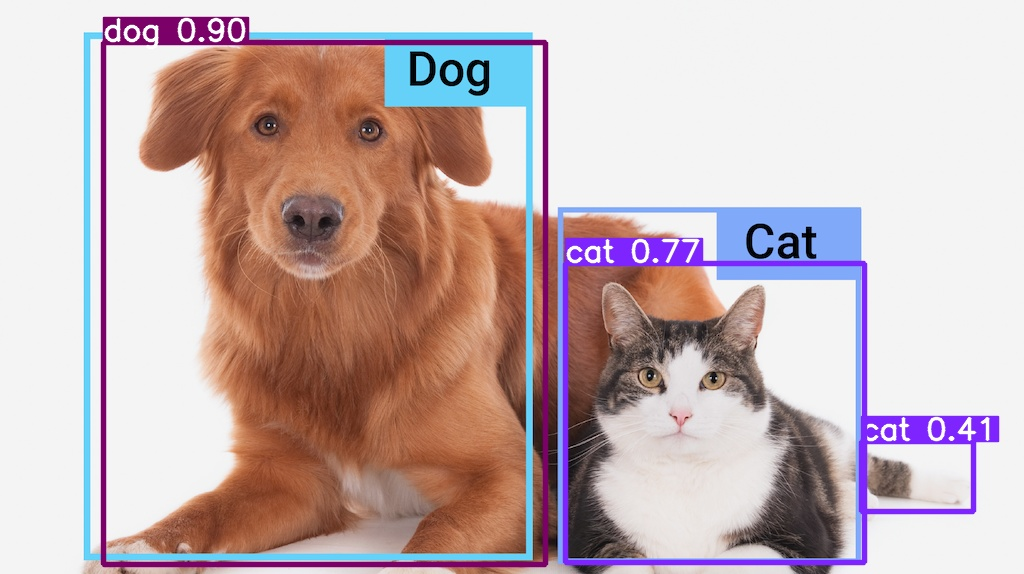

In [15]:
# Imports the Image class from IPython for displaying images
from IPython.display import Image
Image(filename='runs/detect/exp2/test.jpg')

In Summary:

    You clone the YOLOv5 repository and install necessary dependencies.

    You upload an image file (test.jpg), and it’s renamed.

    YOLOv5’s detect.py script is run to perform object detection on the image, using the small YOLOv5 model (yolov5s.pt).

    The result, with detected objects highlighted, is displayed in the notebook.

This process allows you to easily run object detection on any uploaded image using YOLOv5.